In the previous file, we worked on cleaning six data frames containing data on New York City high school test scores, demographics, and school locations. We used tools for data frame manipulation to remove data that we won't need for our analysis, create new variables, change data types, and check for duplicate observations.

In this fiel, we'll learn about efficiently organizing data and how to use string manipulation techniques to finish cleaning the data. Then, we'll learn to combine data frames into one single, clean data frame for further analysis.

We've saved the data we made changes to in the last file in .csv files:

* sat_results_1.csv
* ap_2010_1.csv
* class_size_1.csv
* demographics_1.csv
* graduation_1.csv
* hs_directory_1.csv

Let's import them into R 

`library(readr)`

`sat_results <- read_csv("sat_results_1.csv")
ap_2010 <- read_csv("ap_2010_1.csv") 
class_size <- read_csv("class_size_1.csv")
demographics <- read_csv("demographics_1.csv") 
graduation <- read_csv("graduation_1.csv") 
hs_directory <- read_csv("hs_directory_1.csv")`

[Hadley Wickham](http://hadley.nz/), chief scientist at RStudio and creator of the tidyverse, coined the concept of "tidy data" to describe the organization principles that optimize our ability to make sense of data and to analyze it using popular [tidyverse](https://www.tidyverse.org/) tools.

According to the tidy data concept, for a data set to be tidy:

* Each variable must have its own column.

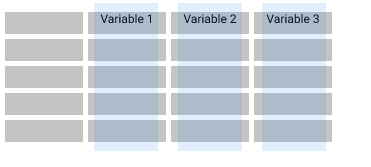

* Each **observation** must have its own row.

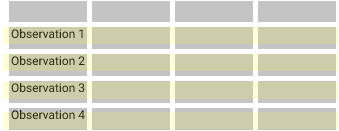

* Each **value** must have its own cell.

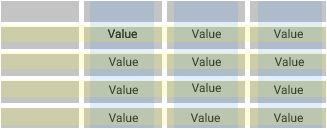

Most functions in R (in base R as well as the tidyverse) work best with data where variables are placed in columns. This is because R is written to work with **vectors** of values.

Real-world data often violate the tidy data principles. For example, consider test score data for 15 students who attend three different schools. This data can be stored in a number of ways, and many of them can be considered untidy. This data set is **untidy**:

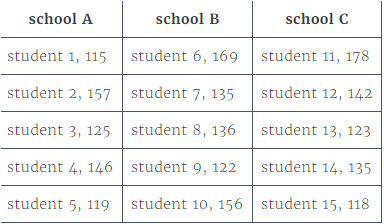

Although each value now has its own cell, the columns are still set up with values of the variable "school" instead of variable names.

This data set is tidy:

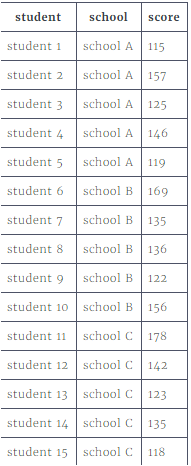

There are three columns: one for each variable in the data set. Each row represents one observation (a score for each student from each school), and each value has its own cell.

Some work upfront to create a tidy data set can save lots of time and allow us to write cleaner, more reproducible code as we work on our project.

Take a moment to preview the six data frames and think about whether their organization fits tidy data principles. Next, we'll dive into using string manipulation to finish cleaning and organizing the NYC schools data for analysis according to tidy data principles.

let's return to the final data cleaning tasks we need to complete before we combine the NYC schools data frames.

In the last file, we performed data cleaning operations that primarily involved numeric data: Changing data types from character to numeric and creating new variables by performing calculations with existing numeric variables. In this file, we'll focus on data cleaning operations that involve working with **strings**.

Let's have a look at the `graduation` data frame. In the last file, we used `filter()` and `select()` to simplify the original data set to contain only data relevant to our analysis.

Now, we need to change the data type of values of the `Total Grads - % of cohort` and `Dropped Out - % of cohort` variables from character to numeric. Notice that the values of these variables are all followed by a `%` symbol. As a result, instead of using `mutate()` or `mutate_at()` to change the data type, we will need to extract only the numeric portion of the character strings.

We can parse each string, or subset it into its different data types, using a handy function from the `readr` package: `parse_number()`. The `parse_number()` function takes a vector as input and drops any characters before or after the first number in strings:

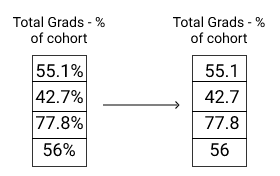

The syntax for creating a new `Total Grads - % of cohort` variable containing only numbers is:

`Total Grads - % of cohort` <- parse_number(`Total Grads - % of cohort`)

To extract numbers from strings for multiple variables at once using `parse_number()`, we can use the `mutate_at()` function. Specify the range of columns we want to transform, and apply the `parse_number()` function to the values in those columns:


`data_frame %>% mutate_at(vars(`first column in range`:`last column in range`), parse_number)`

When we use `parse_number()`, the output values will be numeric. In the event an observation's string does not contain a number, such as rows of graduation where missing values are represented by `s`, we will see a warning message identifying the rows in which there were "parsing failures". In the output of `parse_number()`, values for these observations will be represented by `NA`.

We'll learn much more about working with missing values in later files

**Task**

* Create a new `graduation` data frame in which all values of the following variables consist of numeric data:

    - Total Grads - % of cohort
    - Dropped Out - % of cohort
    
* Remember that warning messages alerting us to parsing failures are to be expected when there are non-numeric values of the variable we are passing to `parse_number()`.

**Answer**

`graduation <- graduation %>%
  mutate(`Total Grads - % of cohort` = parse_number(`Total Grads - % of cohort`),
         `Dropped Out - % of cohort` = parse_number(`Dropped Out - % of cohort`))`

With five of the data frames cleaned, we have one remaining task to perform before we combine the six NYC schools data frames: Extracting numeric values from the `hs_directory` variable `Location 1`.

The `Location 1` variable contains useful information for looking at spatial patterns in the data: The [latitude](https://en.wikipedia.org/wiki/Latitude) and [longitude](https://en.wikipedia.org/wiki/Longitude), collectively known as the [geographic coordinates](https://en.wikipedia.org/wiki/Geographic_coordinate_system), of each school.

For each value of `Location 1`, coordinates are contained within a long character string. We'll need to isolate them so that we can use them for visualizing spatial trends in the future. The latitude values are those that begin with "40," and the longitude values are those that begin with "-73."

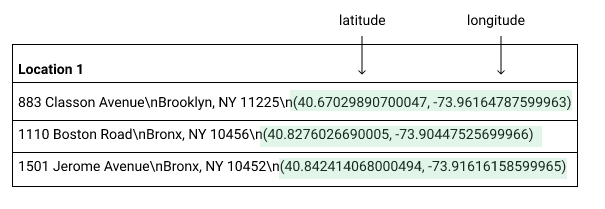

In order to create maps using the NYC schools data, we will need to extract information from `Location 1` to create two new variables: one for latitude and one for longitude:

We can use the `stringr` function `str_split()` to split a string at a certain character.

Within each value of `Location 1`, there are two instances of the character sequence `\n`:

Splitting the string at `\n` will result in three strings for each value of `Location 1`:

The third string contains the latitude and longitude. In this step, let's split the `Location 1` string and add a new variable containing the latitude and longitude coordinates to the `hs_directory` data frame.

**Task**

* Create a new `hs_directory` data frame containing a new variable column, `lat_long`, containing the coordinates (surrounded by parentheses) extracted from the `Location 1` column.


**Answer**

`split_location <- str_split(hs_directory$`Location 1`, "\n", simplify = TRUE)`

`hs_directory <- hs_directory %>%
  mutate(lat_long = split_location[,3])`

We now have a new column in `hs_directory`, `lat_long`, that contains the latitude and longitude for each school:

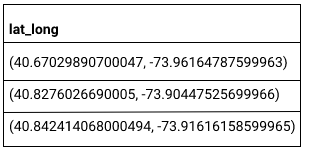

However, we need latitude and longitude to be split into separate variables. This way, when we're ready to create spatial visualizations, our data will be in the correct format for working with other R packages for data visualization.

In the `lat_long` variable, a comma is used to separate the latitude and longitude. We can once again use the `str_split()` function, this time to split `lat_long` at the comma.

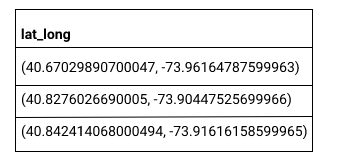

However, we need latitude and longitude to be split into separate variables. This way, when we're ready to create spatial visualizations, our data will be in the correct format for working with other R packages for data visualization.

In the `lat_long` variable, a comma is used to separate the latitude and longitude. We can once again use the `str_split()` function, this time to split `lat_long` at the comma.

**Task**

* Create two new variables, `lat` and `long`, from the lat_long variable. Add them to the `hs_directory` data frame.

**Answer**

`lat_and_long <- str_split(hs_directory$lat_long, ",", simplify = TRUE)`

`hs_directory <- hs_directory %>%
  mutate(lat = lat_and_long[,1], long = lat_and_long[,2])`

We aren't quite finished cleaning the latitude and longitude data, though. Although each column now contains its own variable, the strings still contain non-numeric characters (the parentheses) that will present a problem later when we want to transform the data type to numeric. Note that we want to retain the `-` in the `longitude` column. Negative longitudes denote geographic locations in the Earth's western hemisphere.


For this last step, we can use another `stringr` function, `str_sub()`, to subset strings to include only characters between specified starting and ending positions, as demonstrated in the following diagram:

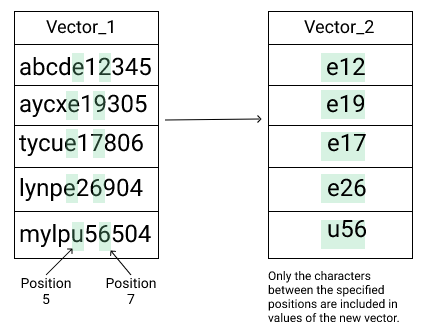

The `str_sub()` function takes as its input the character string we want to subset and the positions, from **left to right**, of the first and last characters we want to return.

`Vector_2  <- Vector_1 %>%  str_sub(5, 7)`

We can perform the same operation by specifying character positions from **right to left** using -:

`Vector_2  <- Vector_1 %>% str_sub(-4, -6)`

We can use the `str_sub()` function to subset the `lat` character strings `(40.67029890700047,` to retain only the characters we need.

Let's create new `lat` and `long` variables that contain only numeric values.

**Task**

* Use `str_sub()` and `mutate()` to create a new `hs_directory` data frame with `lat` and `long` variables containing only numeric characters.
* Convert the data type of the `lat` and `long` variables from character to numeric.

**Answer**

`hs_directory <- hs_directory %>%
  mutate(lat = str_sub(lat, 2, -1), long = str_sub(long, 1, -2))%>%
  mutate_at(vars(lat, long), as.numeric)`

So far, we've performed a variety of data cleaning operations on the data frames:

* Simplified the data frames to contain only variables and observations that we need for our analysis
* Created new variables from existing ones using calculations and string manipulation
* Identified duplicated values

Now that the six individual data frames have been cleaned, the next step is to combine them.

We learned to combine vectors and matrices by rows (using `rbind()`) and columns (using `cbind()`).

When we combined vectors and matrices, we bond values of rows or columns together by position. We learned that if vectors are of different lengths, the recycling rule dictates that the shorter vector is repeated.

In contrast, when we combine a pair of data frames, we will bind columns together based on matching values of a variable rather than on observation positions. The variable used to connect each pair of tables is called a **key**. In this case, we will combine data frames based on the key variable `DBN`:

To combine the data frames, we'll use `dplyr` tools for working with multiple tables of data. When we have multiple tables containing data that we are interested in relationships between, they are collectively referred to as [relational data](https://en.wikipedia.org/wiki/Relational_database).

The six data frames we have been working with are considered relational data since we are interested in **relationships** between variables contained in different tables, such as SAT score and average class size.

The `dplyr` functions we'll use to combine the tables are for performing [mutating joins](https://dplyr.tidyverse.org/reference/join.html), which add new variables to one data frame based on matching observations in another data frame.

If we are familiar with how joining data tables works in SQL, the `dplyr` functions for joining tables will seem very familiar.

As we combine the six NYC schools data frames, we will begin with one data frame and then add variables from the other data frames to it by matching them up with the values of `DBN`, the key. Recall that the term for joins that add new variables to a data frame based on matching observations in another data frame is **mutating joins**. There are two main types of mutating joins that we will discuss:

* Inner Joins
* Outer Joins

### Inner Joins

Let's start with **inner joins**, which match pairs of variables in two data frames whenever their values of the key are the same. The resulting data frame does **not** include any rows with unmatched keys:

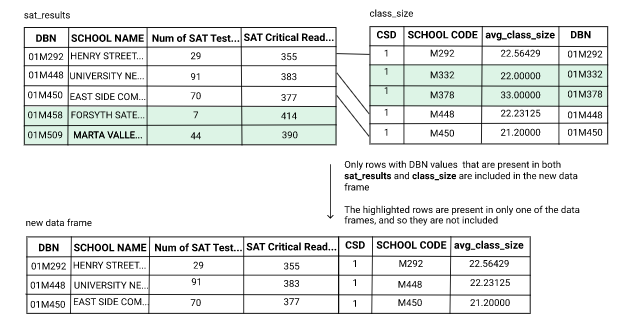

Inner joins are useful when we only want to include results that appear in both of the tables we're joining. For example, if we're interested in using our data to make a scatter plot to understand the relationship between class size and how well students score on the SAT, our new data frame probably doesn't need to include data on total SAT scores that doesn't have a matching class size value.

To combine two tables using an inner join, we can use the `dplyr` function `inner_join()`. The syntax involves beginning with one data frame and specifying the data frame we want to join with it. To specify the identity of the key we'll use for the join, use `by = "DBN"`:

**Task**

* Use the `inner_join()` function to combine the `sat_results` and `class_size` data frames. Save the new data frame as `sat_class_size`.
* Create a scatter plot with `avg_class_size` on the x-axis and `avg_sat_score` on the y-axis to see if SAT scores seem to be related to class size.

**Task**

`library(ggplot)`

`sat_class_size <- sat_results %>%
  inner_join(class_size, by = "DBN")`

`ggplot(data = sat_class_size) +
      aes(x = avg_class_size, y = avg_sat_score) +
      geom_point()`

### Outer joins

**Outer joins** keep observations that appear in at least one of the two tables we're combining. Outer joins can be divided into three types:

* Left joins
* Right joins
* Full joins

Performing a **left join** keeps all observations in the data frame on the left (`sat_results`) and drops observations from the data frame on the right (`class_size`) that have no key (`DBN`) match:

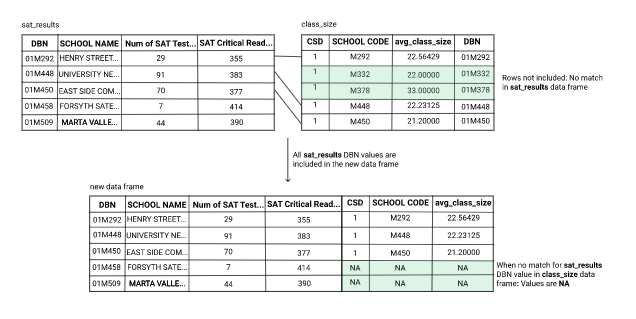

Performing a **right join** keeps all observations in the data frame on the right (`class_size`) and drops observations from the data frame on the left (`sat_results`) that have no key (`DBN`) match


Performing a **full join** keeps all observations from both the **sat_results** and **class_size** data frames, and fills in missing variables with "NA":

The syntax for combining data frames using outer joins is similar to that which we used to perform inner joins. The `dplyr` functions to perform the different types of outer joins are:

* left_join()
* right_join()
* full_join()

As with the `inner_join()` function, when using the three functions for performing outer joins, use `by = "DBN"` to specify the identity of the key.

`sat_results %>%  left_join(class_size, by = "DBN")`

These three types of outer joins are useful under different circumstances, and which one we choose will depend on our data analysis needs.

For example, let's say we mainly are interested in how class size (`avg_class_size` in the `class_size` data frame) and the percentage of a school's students learning English (`ell_percent` in the `demographics` data frame) are related to scores on the writing portion of the SAT. When we combine the `sat_score`, `class_size`, and `demographics` data frames, we may choose to join `class_size` and `demographics` to `sat_score` using `left_join()` so we retain all class size and demographics data that match an SAT score.

We can use the `%>%` operator to chain multiple types of join functions together. To join `class_size` and `demographics` to `sat_results` as described above, we could write:

`combined <- sat_results %>%
  left_join(class_size, by = "DBN") %>%
  left_join(demographics, by = "DBN")`

**Task**

* Join `demographics` to `sat_results` using `left_join()`. Save the resulting data frame as `demo_sat_left`.
* Join demographics to sat_results using `right_join()`. Save the resulting data frame as `demo_sat_right`.
* Join `demographics` to `sat_results` using `full_join()`. Save the resulting data frame as `demo_sat_full`.

**Answer**

`demo_sat_left <- sat_results %>%
  left_join(demographics, by = "DBN")`

`demo_sat_right <- sat_results %>%
  right_join(demographics, by = "DBN")`

`demo_sat_full <- sat_results %>%
  full_join(demographics, by = "DBN")`

Now that we've learned about the different types of joins that can be used to combine data frames, it's time to combine the six data frames to create a single, clean one to use for analyses.

As we decide which types of joins to use to combine the data frames, let's briefly revisit our goal for this analysis: We will use the data to understand how NYC high schools' demographics (race, sex, income, etc.) affect how well students perform academically.

We'll start with the data that provides us with information about students' academic performance: `sat_results` and `ap_2010`. Some high schools may have data only for either SAT scores or AP exams. To make sure we retain all observations from these two data frames, let's combine `ap_2010` with `sat_results` using a full join.

Next, let's consider which type of join we should use to add the `class_size`, `demographics`, `graduation`, and `hs_directory` data to the new data frame we're building. Because we want to retain all observations in `sat_results` and `ap_2010`, it makes sense to use **left joins** so only values of the `class_size`, `demographics`, `graduation`, and `hs_directory` data frames will be included in the new data frame.

**Task**

* Create a new data frame, `combined`, containing data from the six separate data frames we've been working with.
    * Use `full_join()` to join `ap_2010` to `sat_results`.
    * Use `left_join()` to add `class_size`, `demographics`, `graduation`, and `hs_directory` to the new data frame.
    
**Answer**

`combined <- sat_results %>%
  full_join(ap_2010, by = "DBN") %>%
  left_join(class_size, by = "DBN") %>%
  left_join(demographics, by = "DBN") %>%
  left_join(graduation, by = "DBN") %>%
  left_join(hs_directory, by = "DBN")`